# Figure 2

In [1]:
import numpy as np
from scipy.optimize import root
from dataclasses import dataclass
import matplotlib.pyplot as plt
import import_ipynb
import GeneralMethod  # Call functions from GeneralMethod without duplicating 

In [3]:
# Cumulative probability between two points when payments are exponential with mean 5
def I(x,y):
    if x >= 0:
        return np.exp(-x / 5) - np.exp(-y / 5)
    elif y <= 0:
        return 0
    else:
        return 1 - np.exp(-y / 5)

params = GeneralMethod.PaymentParams(
    l_A = 0, 
    l_B = 5, 
    C = 1.0, 
    D = 2.0, 
    alpha = 0.2 / (0.2 + 0.02), 
    n = 20, 
    I = I  # The function I defined above
)

# Find the optimal cost vector
optimal_cost_vector = GeneralMethod.T_n(params)
print("Optimal cost starting at zero with l_A=0 and l_B=5:", optimal_cost_vector[0])

Optimal cost starting at zero with l_A=0 and l_B=5: 7.308761376130171


In [5]:
# We know V_n(0, 5, params) = 0 + 5 + 7.308761376130171 < 13)
GeneralMethod.multi_level_search(params, 0.5, 13, 0.05, 10, unidirectional=True, symmetric=False)

Starting coarse search with step size: 0.5, l_max: 13
Coarse search result: l_A = 0, l_B = 0.5, V = 9.814106234735428
Starting fine search with step size: 0.05 around the coarse minimum


(0, 0.45, 9.813141043741137)

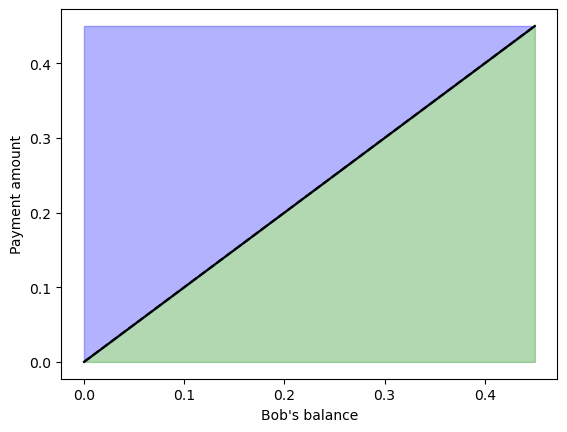

In [7]:
params.l_A = 0 # optimal l_A 
params.l_B = 0.45 # optimal l_B  

optimal_cost_vector = GeneralMethod.T_n(params) # Compute the corresponding optimal cost vector

reverse_optimal_cost_vector = optimal_cost_vector[::-1]

GeneralMethod.Optimal_Policy(reverse_optimal_cost_vector, 5, params, unidirectional=True)